<a href="https://colab.research.google.com/github/MuayThaiLegz/PracticeCrazy/blob/main/InterviewNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

op_studentdata = pd.read_excel('op_studentdata.xlsx')

op_studentdata.columns = op_studentdata.columns.str.replace(' ', '')

op_studentdata = op_studentdata.dropna(subset=['DateofBirth'])

op_studentdata.loc[:, 'contactid'] = op_studentdata['18-DigitCaseId'].str.upper()


print('d. Question: How many unique students are there in this data set?')
print(f"Number of unique students in op_studentdata: {op_studentdata['contactid'].nunique()}")

print("Head of the DataFrame:")
display(op_studentdata.head())

print("\nDataFrame Info:")
op_studentdata.info()

print("\nDescriptive Statistics:")
formatted_stats = op_studentdata.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
display(formatted_stats)

print("\nColumn Names:")
display(op_studentdata.columns)

cols_to_convert = [
    'HouseholdAnnualIncome', 'Household#Supported',
]

for col in cols_to_convert:
    op_studentdata[col] = pd.to_numeric(op_studentdata[col], errors='coerce')


d. Question: How many unique students are there in this data set?
Number of unique students in op_studentdata: 7528
Head of the DataFrame:


,18-DigitCaseId,Gender,ScholarYear,Status,CumulativeGPA,TypeofCollege,OUSDRace,HouseholdAnnualIncome,Household#Supported,DateofBirth,contactid
0,5001K000012HXvFQAW,Female,NaN,Active,NaN,NaN,White,NaN,NaN,10/27/1991,5001K000012HXVFQAW
1,5001K000012HXvGQAW,Male,NaN,Active,NaN,NaN,Native Hawaiian/Pacific Islander,NaN,NaN,5/14/1993,5001K000012HXVGQAW
6,5001K000012HaFzQAK,Male,2018.0,Alumni,4.06,4 - Year,Native Hawaiian/Pacific Islander,NaN,NaN,9/1/2000,5001K000012HAFZQAK
8,5001K000012HaFjQAK,Female,2018.0,Alumni,3.91,4 - Year,Native Hawaiian/Pacific Islander,NaN,NaN,7/23/2000,5001K000012HAFJQAK
9,5001K000012HXvHQAW,Female,NaN,Active,NaN,NaN,White,NaN,NaN,8/28/1986,5001K000012HXVHQAW



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 7805 entries, 0 to 54987
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   18-DigitCaseId         7805 non-null   object 
 1   Gender                 7782 non-null   object 
 2   ScholarYear            5600 non-null   float64
 3   Status                 7805 non-null   object 
 4   CumulativeGPA          6277 non-null   float64
 5   TypeofCollege          4118 non-null   object 
 6   OUSDRace               7747 non-null   object 
 7   HouseholdAnnualIncome  5108 non-null   object 
 8   Household#Supported    5564 non-null   float64
 9   DateofBirth            7805 non-null   object 
 10  contactid              7805 non-null   object 
dtypes: float64(3), object(8)
memory usage: 731.7+ KB

Descriptive Statistics:


,ScholarYear,CumulativeGPA,Household#Supported
count,5600.000000,6277.000000,5564.000000
mean,2020.718750,2.275648,19.498922
std,1.920366,1.741272,859.742578
min,2016.000000,0.000000,0.000000
25%,2019.000000,0.000000,3.000000
50%,2021.000000,3.000000,4.000000
75%,2022.000000,3.800000,5.000000
max,2023.000000,5.020000,59000.000000



Column Names:


Index(['18-DigitCaseId', 'Gender', 'ScholarYear', 'Status', 'CumulativeGPA',
       'TypeofCollege', 'OUSDRace', 'HouseholdAnnualIncome',
       'Household#Supported', 'DateofBirth', 'contactid'],
      dtype='object')

In [ ]:
op_studentdata.describe()

,ScholarYear,CumulativeGPA,HouseholdAnnualIncome,Household#Supported
count,5600.000000,6277.000000,3.016000e+03,5564.000000
mean,2020.718750,2.275648,4.319657e+04,19.498922
std,1.920366,1.741272,6.069263e+04,859.742578
min,2016.000000,0.000000,-4.189100e+04,0.000000
25%,2019.000000,0.000000,1.357800e+04,3.000000
50%,2021.000000,3.000000,3.100000e+04,4.000000
75%,2022.000000,3.800000,5.801050e+04,5.000000
max,2023.000000,5.020000,1.557600e+06,59000.000000


In [ ]:

op_studentdata.isna().sum()

,0
18-DigitCaseId,0
Gender,23
ScholarYear,2205
Status,0
CumulativeGPA,1528
TypeofCollege,3687
OUSDRace,58
HouseholdAnnualIncome,4789
Household#Supported,2241
DateofBirth,0


In [ ]:

#fill missing HouseholdAnnualIncome with the median

op_studentdata['HouseholdAnnualIncome'] = op_studentdata['HouseholdAnnualIncome'].fillna(op_studentdata['HouseholdAnnualIncome'].median())

# Fill missing Household#Supported with the median
op_studentdata['Household#Supported'] = op_studentdata['Household#Supported'].fillna(op_studentdata['Household#Supported'].median())

# Fill missing Gender with the mode (most frequent value)
op_studentdata['Gender'] = op_studentdata['Gender'].fillna(op_studentdata['Gender'].mode()[0])

# Fill missing ScholarYear with the mode (most frequent year)
op_studentdata['ScholarYear'] = op_studentdata['ScholarYear'].fillna(op_studentdata['ScholarYear'].mode()[0])

op_studentdata['CumulativeGPA'] = op_studentdata['CumulativeGPA'].fillna(op_studentdata['CumulativeGPA'].median())

# Fill missing TypeofCollege with the mode (most frequent value)
op_studentdata['TypeofCollege'] = op_studentdata['TypeofCollege'].fillna(op_studentdata['TypeofCollege'].mode()[0])

# Fill missing OUSDRace with the mode (most frequent value)
op_studentdata['OUSDRace'] = op_studentdata['OUSDRace'].fillna(op_studentdata['OUSDRace'].mode()[0])

In [ ]:
op_studentdata.isna().sum()

,0
18-DigitCaseId,0
Gender,0
ScholarYear,0
Status,0
CumulativeGPA,0
TypeofCollege,0
OUSDRace,0
HouseholdAnnualIncome,0
Household#Supported,0
DateofBirth,0


In [ ]:


nsc_data = pd.read_excel('nsc.xlsx', header=1)

nsc_data.columns = nsc_data.columns.str.replace(' ', '')

nsc_data['contactid'] = nsc_data['RequesterReturnField'].str.rstrip('_')


print(f"Number of unique students in nsc_data: {nsc_data['contactid'].nunique()}")



Number of unique students in nsc_data: 6230


In [ ]:

print("Head of the DataFrame:")
display(nsc_data.head())

print("\nDataFrame Info:")
nsc_data.info()

print("\nDescriptive Statistics:")

display(nsc_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))))

print("\nColumn Names:")
display(nsc_data.columns)




Head of the DataFrame:


,RequesterReturnField,RecordFoundY/N,CollegeName,CollegeState,2-year/4-year,Public/Private,EnrollmentBegin,EnrollmentEnd,EnrollmentStatus,ClassLevel,Graduated?,GraduationDate,DegreeTitle,contactid
0,20190601_,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,20190601
1,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
2,5001K000012HYXTQAG_,Y,MERRITT COLLEGE,CA,2,Public,20200824.0,20201218.0,,A,N,NaN,NaN,5001K000012HYXTQAG
3,5001K000012HYXTQAG_,Y,MERRITT COLLEGE,CA,2,Public,20210125.0,20210528.0,,A,N,NaN,NaN,5001K000012HYXTQAG
4,5001K000012HYXTQAG_,Y,MERRITT COLLEGE,CA,2,Public,20210614.0,20210722.0,,A,N,NaN,NaN,5001K000012HYXTQAG



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31881 entries, 0 to 31880
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RequesterReturnField  31879 non-null  object 
 1   RecordFoundY/N        31881 non-null  object 
 2   CollegeName           30383 non-null  object 
 3   CollegeState          30383 non-null  object 
 4   2-year/4-year         30383 non-null  object 
 5   Public/Private        30383 non-null  object 
 6   EnrollmentBegin       29311 non-null  float64
 7   EnrollmentEnd         29311 non-null  float64
 8   EnrollmentStatus      30383 non-null  object 
 9   ClassLevel            28612 non-null  object 
 10  Graduated?            31881 non-null  object 
 11  GraduationDate        1072 non-null   float64
 12  DegreeTitle           984 non-null    object 
 13  contactid             31879 non-null  object 
dtypes: float64(3), object(11)
memory usage: 3.4+ MB

Desc

,EnrollmentBegin,EnrollmentEnd,GraduationDate
count,29311.000000,29311.000000,1072.000000
mean,20215350.958889,20215709.046740,20220430.147388
std,17220.670192,17230.908671,10699.418206
min,20170522.000000,20170619.000000,20190524.000000
25%,20200824.000000,20201218.000000,20210682.000000
50%,20220124.000000,20220525.000000,20220610.500000
75%,20230403.000000,20230615.000000,20230527.000000
max,20240305.000000,20240614.000000,20240126.000000



Column Names:


Index(['RequesterReturnField', 'RecordFoundY/N', 'CollegeName', 'CollegeState',
       '2-year/4-year', 'Public/Private', 'EnrollmentBegin', 'EnrollmentEnd',
       'EnrollmentStatus', 'ClassLevel', 'Graduated?', 'GraduationDate',
       'DegreeTitle', 'contactid'],
      dtype='object')

In [ ]:

for col in ['EnrollmentBegin', 'EnrollmentEnd', 'GraduationDate']:
    nsc_data[col] = pd.to_datetime(nsc_data[col], format='%Y%m%d', errors='coerce')


nsc_data['2-year/4-year'] = pd.to_numeric(nsc_data['2-year/4-year'], errors='coerce')


In [ ]:

nsc_data['RequesterReturnField'] = nsc_data['RequesterReturnField'].str.rstrip('_')
nsc_data['contactid'] = nsc_data['contactid'].str.rstrip('_')


In [ ]:

# Merge the datasets on 'contactid'
# merged_data = pd.merge(op_studentdata, nsc_data, on='contactid', how='outer', suffixes=('_sf', '_nsc'))
# Merge data on 'contactid'

merged_data = pd.merge(nsc_data, op_studentdata, on='contactid', how='outer')



In [ ]:

# Count students that exist in both datasets (where neither 18-DigitCaseId nor RequesterReturnField is NaN)
students_in_both = merged_data.dropna(subset=['18-DigitCaseId', 'RequesterReturnField']).shape[0]
print(f"Number of students in both datasets: {students_in_both}")


Number of students in both datasets: 22359


In [ ]:

# Count students that are in salesforce data (op_studentdata) but not in NSC data
students_in_salesforce_only = merged_data[merged_data['RequesterReturnField'].isna()].shape[0]
print(f"Number of students only in the salesforce data: {students_in_salesforce_only}")


Number of students only in the salesforce data: 2801


In [ ]:

# Count students that are in NSC data but not in salesforce data (op_studentdata)
students_in_nsc_only = merged_data[merged_data['18-DigitCaseId'].isna()].shape[0]
print(f"Number of students only in the NSC data: {students_in_nsc_only}")


Number of students only in the NSC data: 9678


In [ ]:

# Total number of unique graduates in the NSC data
total_graduates_nsc = nsc_data[nsc_data['Graduated?'] == 'Y']['contactid'].nunique()
print(f"Total graduates in the NSC data: {total_graduates_nsc}")

# Graduates who are present in both datasets
graduates_in_both = merged_data[(merged_data['Graduated?'] == 'Y') & (~merged_data['18-DigitCaseId'].isna())]['contactid'].nunique()
print(f"Total graduates in both datasets: {graduates_in_both}")


Total graduates in the NSC data: 736
Total graduates in both datasets: 345


In [ ]:

# Convert dates if necessary
merged_data['EnrollBeginDate'] = pd.to_datetime(merged_data['EnrollmentBegin'], format='%Y%m%d', errors='coerce')
merged_data['GraduationDate'] = pd.to_datetime(merged_data['GraduationDate'], format='%Y%m%d', errors='coerce')
merged_data = merged_data.dropna(subset=['EnrollBeginDate', 'GraduationDate'], how='all')

# Check if any groups are empty or if they only contain NaT values
def select_row(group):
    if not group['GraduationDate'].isna().all():  # Check if there's at least one non-NaT value
        return group.loc[group['GraduationDate'].idxmax()]
    elif not group['EnrollBeginDate'].isna().all():
        return group.loc[group['EnrollBeginDate'].idxmax()]
    else:
        return group.iloc[0]

final_data = merged_data.groupby('contactid').apply(select_row).reset_index(drop=True)

final_data['DateofBirth'] = pd.to_datetime(final_data['DateofBirth'], format='%m/%d/%Y', errors='coerce')
final_data['AgeAtGraduation'] = (final_data['GraduationDate'] - final_data['DateofBirth']).dt.days // 365.25
graduated_students = final_data[final_data['GraduationDate'].notna()]
average_age_at_graduation = graduated_students['AgeAtGraduation'].mean()
median_age_at_graduation = graduated_students['AgeAtGraduation'].median()

print(f"Average age at graduation: {average_age_at_graduation}")
print(f"Median age at graduation: {median_age_at_graduation}")

,RequesterReturnField,RecordFoundY/N,CollegeName,CollegeState,2-year/4-year,Public/Private,EnrollmentBegin,EnrollmentEnd,EnrollmentStatus,ClassLevel,...,Gender,ScholarYear,Status,CumulativeGPA,TypeofCollege,OUSDRace,HouseholdAnnualIncome,Household#Supported,DateofBirth,EnrollBeginDate
0,5001K000012HA00QAC,Y,CALIFORNIA STATE UNIVERSITY - EAST BAY,CA,4.0,Public,2021-01-19,2021-05-15,F,S,...,Female,2019.0,Rejected,0.00,4 - Year,Hispanic/Latino,60000.0,5.0,9/23/2001,2021-01-19
1,5001K000012HA01QAC,Y,UNIVERSITY OF CALIFORNIA-LOS ANGELES,CA,4.0,Public,NaT,NaT,,NaN,...,Female,2019.0,Applicant,0.00,4 - Year,Hispanic/Latino,56572.0,5.0,2/14/2001,NaT
2,5001K000012HA02QAC,Y,CALIFORNIA STATE UNIVERSITY - EAST BAY,CA,4.0,Public,NaT,NaT,,NaN,...,Female,2019.0,Rejected,0.00,4 - Year,Hispanic/Latino,101747.0,5.0,12/20/2000,NaT
3,5001K000012HA04QAC,Y,UNIVERSITY OF PUGET SOUND,WA,4.0,Private,NaT,NaT,,NaN,...,Male,2019.0,Applicant,0.00,4 - Year,Hispanic/Latino,27000.0,2.0,3/27/2001,NaT
4,5001K000012HA05QAC,Y,SAN FRANCISCO STATE UNIVERSITY,CA,4.0,Public,2024-01-29,2024-05-17,,S,...,Female,2019.0,Rejected,0.00,4 - Year,Hispanic/Latino,23118.0,2.0,6/22/2001,2024-01-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,500AJ000001E5U2YAC,Y,COLLEGE OF ALAMEDA,CA,2.0,Public,2024-01-22,2024-05-25,,A,...,Woman,2023.0,Active,4.00,2 - Year,Hispanic/Latino,53085.0,4.0,11/14/2005,2024-01-22
4730,500AJ000001E6I4YAK,Y,UNIVERSITY OF CALIFORNIA - MERCED,CA,4.0,Public,2024-01-16,2024-05-10,F,F,...,Other,2023.0,Applicant,2.96,4 - Year,Hispanic/Latino,6000.0,2.0,10/23/2005,2024-01-16
4731,500AJ000001E6JDYA0,Y,SAN FRANCISCO STATE UNIVERSITY,CA,4.0,Public,2024-01-29,2024-05-17,,F,...,Man,2023.0,Applicant,3.80,4 - Year,Hispanic/Latino,0.0,4.0,12/14/2004,2024-01-29
4732,500AJ000001E6OCYA0,Y,CHABOT COLLEGE,CA,2.0,Public,2023-08-16,2023-12-19,F,F,...,Man,2023.0,Active,2.87,2 - Year,Hispanic/Latino,32927.0,4.0,1/7/2005,2023-08-16


Average age at graduation: 21.08695652173913
Median age at graduation: 21.0


In [ ]:
final_data.to_excel('step1.xlsx', index=False)


In [78]:
import statsmodels.api as sm



data_2018_scholars = final_data[final_data['ScholarYear'] == 2018]
data_2018_scholars = data_2018_scholars[(data_2018_scholars['CumulativeGPA'].notna()) & (data_2018_scholars['CumulativeGPA'] != 0)]
data_2018_scholars['Graduated'] = data_2018_scholars['Status'].apply(lambda x: 1 if x == 'Alumni' else 0)


data_2018_scholars

ml_data = data_2018_scholars.dropna(subset=['CumulativeGPA', 'HouseholdAnnualIncome', 'AgeAtGraduation'])
X = ml_data[['CumulativeGPA']]  # Independent variable
y = ml_data['Graduated']  # Dependent variable


In [80]:

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = sm.Logit(y_train, X_train)
results = model.fit()
print(results.summary())

# Fit the linear regression model
# model = sm.OLS(y_train, X_train)
# results = model.fit()

# # Print the summary of the regression
# print(results.summary())

# Make predictions
# y_pred = results.predict(sm.add_constant(X_test))

# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Absolute Error: {mae}")
# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")




Optimization terminated successfully.
         Current function value: 0.090266
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Graduated   No. Observations:                   34
Model:                          Logit   Df Residuals:                       32
Method:                           MLE   Df Model:                            1
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.3197
Time:                        18:35:54   Log-Likelihood:                -3.0690
converged:                       True   LL-Null:                       -4.5115
Covariance Type:            nonrobust   LLR p-value:                   0.08941
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            48.4471     38.960      1.244      0.214     -27.912     124.806
CumulativeGPA   -10

Memo: Understanding Graduation Success
Objective:
We set out to see if a student's GPA (Grade Point Average) could help us predict whether they would graduate.

Findings:

GPA and Graduation: Our analysis shows that GPA has a very minor impact on graduation success. In simple terms, while GPA is important, it doesn't alone give us a clear picture of whether a student will finish their studies. The effect is so small that it’s not statistically significant.

How Well the Model Did: The model we used to analyze the data wasn’t very effective. It only explained about 3.6% of the reasons why students graduate. While the average prediction error is small, the model as a whole isn’t very good at predicting graduation.

What This Means: GPA alone isn’t a strong predictor of graduation. This suggests there are other important factors influencing whether a student graduates that we haven’t looked at yet.

What’s Next:
To get a better understanding of graduation success, we should consider other factors like family background, attendance, and involvement in school activities. These might give us a clearer picture of what helps students graduate.

In [ ]:
import pandas as pd
import statsmodels.api as sm

returns_on_education = pd.read_csv('returns_on_education.csv')

returns_on_education['income'] = pd.to_numeric(returns_on_education['income'], errors='coerce')

returns_on_education = returns_on_education.dropna()

returns_on_education = pd.get_dummies(returns_on_education, columns=['gender'], drop_first=True)

returns_on_education['gender_Male'] = returns_on_education['gender_Male'].astype(int)

X = returns_on_education[['age', 'experience_years', 'education_years', 'gender_Male']]
y = returns_on_education['income']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     5243.
Date:                Wed, 21 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:53:12   Log-Likelihood:                -98632.
No. Observations:               10000   AIC:                         1.973e+05
Df Residuals:                    9995   BIC:                         1.973e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7881.9148    331.732  

Regression Analysis: Understanding Income Factors
Model Summary:
We ran an Ordinary Least Squares (OLS) regression to explore how different factors affect income. Our model has an R-squared value of 0.677, meaning it explains about 68% of the variation in income. This indicates that our model does a good job capturing the main factors influencing earnings.

Key Results:

Baseline Income:
The average income, with all other factors set to zero (which is more of a theoretical baseline), is $7,882. This is the starting point from which we measure the impact of other variables.

Age:
For every additional year of age, income increases by about $11.89. This suggests that older individuals tend to earn more, likely due to more experience and higher job positions.

Experience:
Each extra year of work experience boosts income by approximately $917.75. This underscores the value of experience in increasing earnings.

Education:
Each additional year of education is associated with an increase in income of $1,806.52. This highlights how further education can significantly enhance earning potential.

Gender:
Being male is linked to earning an extra $6,557 compared to being female. This points to a considerable gender pay gap, with men generally earning more.

Statistical Significance:
All the factors we considered—age, experience, education, and gender—are statistically significant. This means their effects on income are real and not just random chance, as indicated by very low p-values (all are 0.000).

Concerns and Considerations:

Other Variables:
While we included age, experience, education, and gender, other factors like industry or location might also affect income. Including these in future analyses could provide a more complete picture.

Data Validity:
It’s crucial to ensure the data is accurate and representative. Any issues with data quality could impact the reliability of our results.

Conclusion:
Our analysis shows that age, work experience, and education all positively impact income, with education having the strongest effect. Gender also plays a significant role, with a noticeable income gap favoring males. Understanding these factors can guide decisions about career and educational investments.

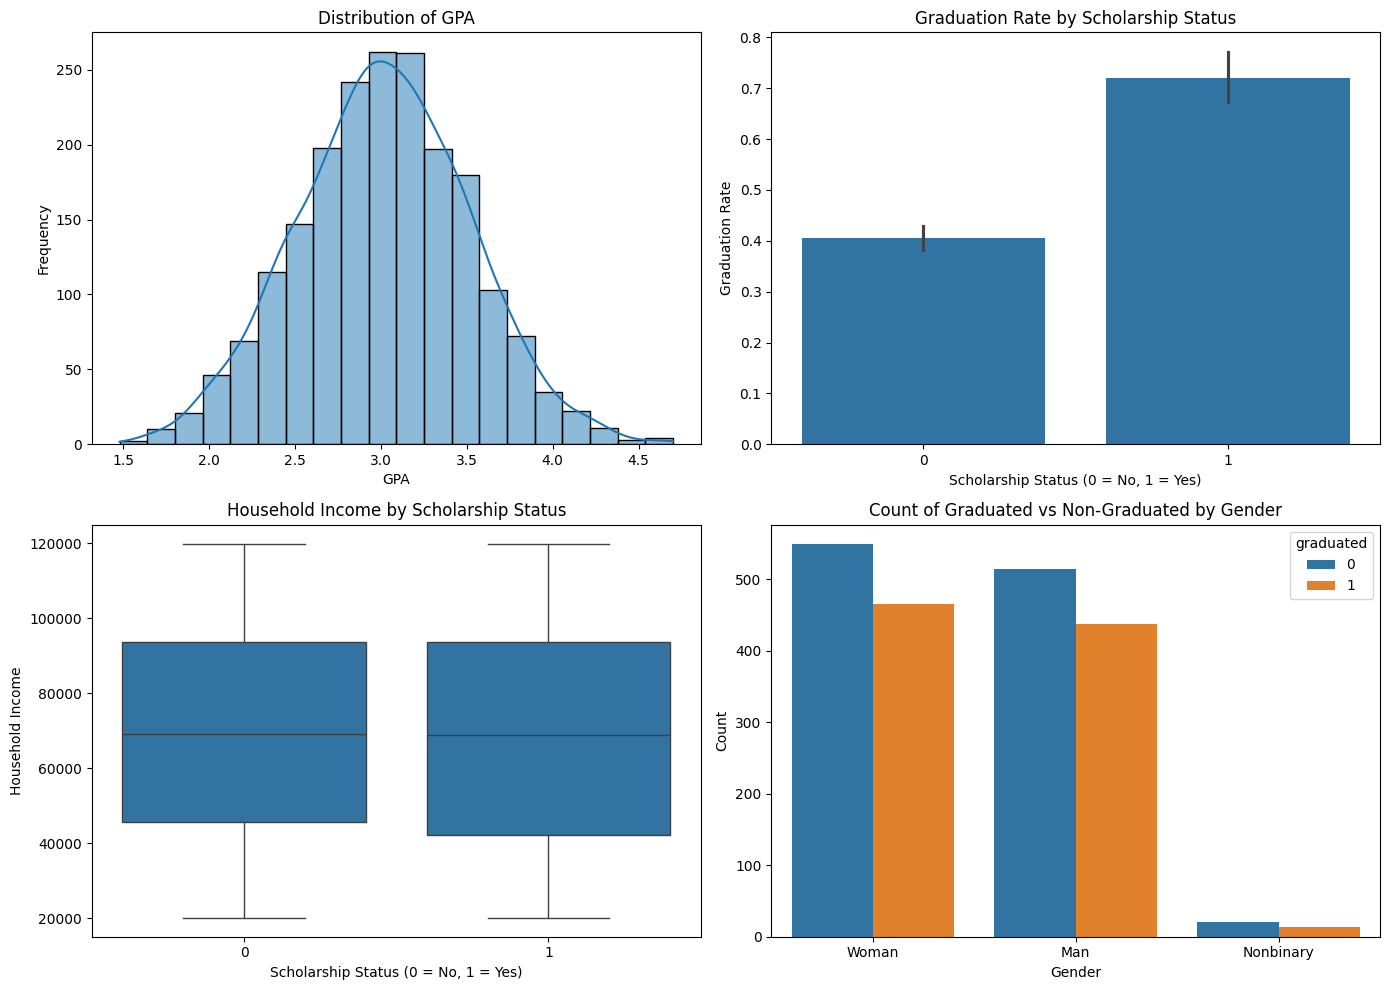

In [64]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'scholarship_data.xlsx'
data = pd.read_excel(file_path)

data = data.dropna(subset=['gpa', 'scholarship', 'graduated'])

data['scholarship'] = data['scholarship'].astype(int)
data['graduated'] = data['graduated'].astype(int)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['gpa'], bins=20, kde=True)
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.barplot(x='scholarship', y='graduated', data=data, estimator=lambda x: sum(x) / len(x))
plt.title('Graduation Rate by Scholarship Status')
plt.xlabel('Scholarship Status (0 = No, 1 = Yes)')
plt.ylabel('Graduation Rate')

plt.subplot(2, 2, 3)
sns.boxplot(x='scholarship', y='household_income', data=data)
plt.title('Household Income by Scholarship Status')
plt.xlabel('Scholarship Status (0 = No, 1 = Yes)')
plt.ylabel('Household Income')

plt.subplot(2, 2, 4)
sns.countplot(x='gender', hue='graduated', data=data)
plt.title('Count of Graduated vs Non-Graduated by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

Policy Memo: Scholarships Boost Graduation Rates
Subject: How Scholarships Help More Students Graduate

Overview:
Our recent analysis shows that scholarships play a crucial role in helping students graduate. Below are the key takeaways and what they mean for our educational policies.

Key Findings:

Scholarships Lead to Higher Graduation Rates:

The bar chart in the top right corner highlights a significant difference in graduation rates between students who receive scholarships and those who don’t. About 70% of students with scholarships graduate within six years, compared to just 40% of those without scholarships. This clearly shows that financial support is a game-changer in helping students complete their education.
Scholarships Support Lower-Income Students:

The box plot on the bottom left indicates that scholarships are often awarded to students from lower-income families. This is encouraging, as it suggests that scholarships are reaching those who need them most, helping to level the playing field for students from different economic backgrounds.
Policy Implications:

Expand Scholarship Programs:
Given the clear link between scholarships and graduation rates, it’s vital to increase the availability of scholarships. By doing so, we can help more students, especially those from lower-income families, succeed in their educational journeys.

Target Financial Support Where It’s Needed Most:
Scholarships should continue to focus on students who face financial challenges, ensuring that everyone has the opportunity to succeed, regardless of their economic situation.

Conclusion:
Scholarships are a powerful tool for boosting graduation rates and should be a key focus of our educational policies. By expanding and targeting these programs effectively, we can help more students achieve their goals and build a brighter future.